# OFFICE ANALYSIS

##### IMPORTING LIBRARIES 

In [1]:
### importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
office_data = pd.read_excel('office_supplies.xlsx')
office_data.head()

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2015-110870,42350,First Class,West,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,299.94,6,0.0,NaN
1,CA-2015-110870,42350,First Class,West,OFF-SU-10001225,Office Supplies,Supplies,Staple remover,25.76,7,0.0,NaN
2,CA-2014-143210,41974,First Class,East,TEC-PH-10004434,Technology,Phones,Cisco IP Phone 7961G VoIP phone - Dark gray,271.90,2,0.0,NaN
3,CA-2014-143210,41974,First Class,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",45.84,3,0.0,NaN
4,CA-2014-143210,41974,First Class,East,FUR-FU-10002268,Furniture,Furnishings,Ultra Door Push Plate,9.82,2,0.0,NaN


In [3]:
### looking dataset information
office_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9993 non-null   object 
 1   Order Date    9993 non-null   int64  
 2   Ship Mode     9993 non-null   object 
 3   Region        9993 non-null   object 
 4   Product ID    9993 non-null   object 
 5   Category      9993 non-null   object 
 6   Sub-Category  9993 non-null   object 
 7   Product Name  9993 non-null   object 
 8   Sales         9993 non-null   float64
 9   Quantity      9993 non-null   int64  
 10  Discount      9993 non-null   float64
 11  Profit        8000 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 937.0+ KB


#### Quick ML to predict Null Profit

In [4]:
### getting all nul values from the dataset
null_values = office_data[office_data.isnull().any(axis=1)]

In [5]:
non_null_values = office_data[pd.notnull(office_data.Profit)]
non_null_values.columns

Index(['Order ID', 'Order Date', 'Ship Mode', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

In [6]:
### dropping all nul values from the dataset 
ml_non_null_values = non_null_values.drop(['Order ID', 'Order Date', 'Product ID', 'Product Name'], axis = 1)
ml_non_null_values

,Ship Mode,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
1993,Second Class,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1994,Second Class,South,Furniture,Chairs,731.9400,3,0.00,219.5820
1995,Second Class,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
1996,Standard Class,South,Furniture,Tables,957.5775,5,0.45,-383.0310
1997,Standard Class,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...
9988,Second Class,West,Office Supplies,Binders,9.6120,6,0.70,-7.3692
9989,First Class,West,Technology,Accessories,199.7500,5,0.00,87.8900
9990,First Class,West,Furniture,Tables,1673.1840,12,0.20,20.9148
9991,First Class,West,Furniture,Furnishings,12.1800,7,0.00,3.8976


In [7]:
### all non null nalues from the dataset
cleanup_nums = {"Ship Mode": {"Standard Class": 0, "Second Class": 1, "First Class": 2, "Same Day": 3},
                "Region": {"West": 0, "East": 1, "Central": 2, "South": 3},
                "Category": {"Office Supplies": 0, "Furniture": 1, "Technology": 2},
                "Sub-Category": {"Binders": 0, "Paper": 1, "Furnishings": 2, "Phones": 3,
                              "Storage": 4, "Art": 5, "Accessories": 6, "Chairs": 7,
                              "Appliances": 8, "Envelopes": 9, "Tables": 10, "Bookcases": 11, 
                                 "Fasteners": 12, "Supplies": 13, "Labels": 14, "Machines": 15, "Copiers": 16} 
               }
ml_non_null_values = ml_non_null_values.replace(cleanup_nums)

In [8]:
ml_non_null_values

,Ship Mode,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
1993,1,3,1,11,261.9600,2,0.00,41.9136
1994,1,3,1,7,731.9400,3,0.00,219.5820
1995,1,0,0,14,14.6200,2,0.00,6.8714
1996,0,3,1,10,957.5775,5,0.45,-383.0310
1997,0,3,0,4,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...
9988,1,0,0,0,9.6120,6,0.70,-7.3692
9989,2,0,2,6,199.7500,5,0.00,87.8900
9990,2,0,1,10,1673.1840,12,0.20,20.9148
9991,2,0,1,2,12.1800,7,0.00,3.8976


In [9]:
# Standard class = shipping within 6days
# Second class = shipping within 3days
# First class = shipping within 1day
# Same day = shipping on the same day
ml_non_null_values['Ship Mode'].value_counts()

0    4788
1    1565
2    1220
3     427
Name: Ship Mode, dtype: int64

In [10]:
ml_non_null_values['Region'].value_counts()

0    2605
1    2270
2    1816
3    1309
Name: Region, dtype: int64

In [11]:
ml_non_null_values['Category'].value_counts()

0    4840
1    1691
2    1469
Name: Category, dtype: int64

In [12]:
ml_non_null_values['Sub-Category'].value_counts()

0     1214
1     1099
2      753
3      720
4      680
5      648
6      600
7      502
8      362
14     291
10     254
9      216
11     182
12     181
13     149
15      95
16      54
Name: Sub-Category, dtype: int64

In [13]:
X = ml_non_null_values.drop('Profit', axis = 1)
y = ml_non_null_values['Profit']

In [14]:
# Normalizing the data set
scaler = StandardScaler(with_mean=False, with_std=False)
scaler.fit(X)

StandardScaler(with_mean=False, with_std=False)

In [15]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2 , random_state = 87)

In [16]:
reg = GradientBoostingRegressor(learning_rate=0.1, n_estimators=50, subsample=1.0, criterion='mse', 
                                min_samples_split=56, min_samples_leaf=4, min_weight_fraction_leaf=0.0, max_depth=8,
                                min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, 
                                max_features=None, alpha=0.5, verbose=0, max_leaf_nodes=None, 
                                warm_start=False,validation_fraction=0.1, n_iter_no_change=None, 
                                tol=0.01, ccp_alpha=0.0)

In [17]:
reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.5, criterion='mse', max_depth=8,
                          min_samples_leaf=4, min_samples_split=56,
                          n_estimators=50, tol=0.01)

In [18]:
mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 5979.2686


###### Prediction with model

In [19]:
# null_predictors = null_values.drop(['Order ID', 'Order Date', 'Product ID', 'Product Name'], axis = 1)
# null_predictors
null_values

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2015-110870,42350,First Class,West,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,299.940,6,0.0,NaN
1,CA-2015-110870,42350,First Class,West,OFF-SU-10001225,Office Supplies,Supplies,Staple remover,25.760,7,0.0,NaN
2,CA-2014-143210,41974,First Class,East,TEC-PH-10004434,Technology,Phones,Cisco IP Phone 7961G VoIP phone - Dark gray,271.900,2,0.0,NaN
3,CA-2014-143210,41974,First Class,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",45.840,3,0.0,NaN
4,CA-2014-143210,41974,First Class,East,FUR-FU-10002268,Furniture,Furnishings,Ultra Door Push Plate,9.820,2,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1988,CA-2014-110422,41660,Second Class,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,NaN
1989,CA-2017-121258,42792,Standard Class,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,NaN
1990,CA-2017-121258,42792,Standard Class,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,NaN
1991,CA-2017-121258,42792,Standard Class,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,NaN


In [20]:
cleanup_nums = {"Ship Mode": {"Standard Class": 0, "Second Class": 1, "First Class": 2, "Same Day": 3},
                "Region": {"West": 0, "East": 1, "Central": 2, "South": 3},
                "Category": {"Office Supplies": 0, "Furniture": 1, "Technology": 2},
                "Sub-Category": {"Binders": 0, "Paper": 1, "Furnishings": 2, "Phones": 3,
                              "Storage": 4, "Art": 5, "Accessories": 6, "Chairs": 7,
                              "Appliances": 8, "Envelopes": 9, "Tables": 10, "Bookcases": 11, 
                                 "Fasteners": 12, "Supplies": 13, "Labels": 14, "Machines": 15, "Copiers": 16} 
               }
null_values = null_values.replace(cleanup_nums)

In [21]:
null_predictors_without_profit = null_values.drop('Profit', axis = 1)
null_predictors_without_profit

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount
0,CA-2015-110870,42350,2,0,TEC-AC-10002926,2,6,Logitech Wireless Marathon Mouse M705,299.940,6,0.0
1,CA-2015-110870,42350,2,0,OFF-SU-10001225,0,13,Staple remover,25.760,7,0.0
2,CA-2014-143210,41974,2,1,TEC-PH-10004434,2,3,Cisco IP Phone 7961G VoIP phone - Dark gray,271.900,2,0.0
3,CA-2014-143210,41974,2,1,FUR-FU-10003878,1,2,"Linden 10"" Round Wall Clock, Black",45.840,3,0.0
4,CA-2014-143210,41974,2,1,FUR-FU-10002268,1,2,Ultra Door Push Plate,9.820,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1988,CA-2014-110422,41660,1,3,FUR-FU-10001889,1,2,Ultra Door Pull Handle,25.248,3,0.2
1989,CA-2017-121258,42792,0,0,FUR-FU-10000747,1,2,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0
1990,CA-2017-121258,42792,0,0,TEC-PH-10003645,2,3,Aastra 57i VoIP phone,258.576,2,0.2
1991,CA-2017-121258,42792,0,0,OFF-PA-10004041,0,1,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0


In [22]:
pred = reg.predict(null_predictors_without_profit.drop(['Order ID', 'Order Date', 'Product ID', 'Product Name'], axis = 1)).tolist()
pred[:5]

[73.07868580364051,
 7.479083256629234,
 67.57204970580248,
 17.123752677473373,
 6.4894542594745515]

In [23]:
null_values['Profit'] = pred

In [24]:
null_values_after_pred = null_values
null_values_after_pred

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2015-110870,42350,2,0,TEC-AC-10002926,2,6,Logitech Wireless Marathon Mouse M705,299.940,6,0.0,73.078686
1,CA-2015-110870,42350,2,0,OFF-SU-10001225,0,13,Staple remover,25.760,7,0.0,7.479083
2,CA-2014-143210,41974,2,1,TEC-PH-10004434,2,3,Cisco IP Phone 7961G VoIP phone - Dark gray,271.900,2,0.0,67.572050
3,CA-2014-143210,41974,2,1,FUR-FU-10003878,1,2,"Linden 10"" Round Wall Clock, Black",45.840,3,0.0,17.123753
4,CA-2014-143210,41974,2,1,FUR-FU-10002268,1,2,Ultra Door Push Plate,9.820,2,0.0,6.489454
...,...,...,...,...,...,...,...,...,...,...,...,...
1988,CA-2014-110422,41660,1,3,FUR-FU-10001889,1,2,Ultra Door Pull Handle,25.248,3,0.2,7.171466
1989,CA-2017-121258,42792,0,0,FUR-FU-10000747,1,2,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,27.784326
1990,CA-2017-121258,42792,0,0,TEC-PH-10003645,2,3,Aastra 57i VoIP phone,258.576,2,0.2,30.928890
1991,CA-2017-121258,42792,0,0,OFF-PA-10004041,0,1,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,14.079345


###### Replace figures after prediction df

In [25]:
cleanup_nums = {"Ship Mode": {0: "Standard Class", 1: "Second Class" , 2: "First Class" , 3: "Same Day" },
                "Region": {0: "West" , 1: "East" , 2: "Central" , 3: "South" },
                "Category": {0: "Office Supplies" , 1: "Furniture" , 2: "Technology" },
                "Sub-Category": {0: "Binders" , 1: "Paper" , 2: "Furnishings" , 3: "Phones" ,
                              4: "Storage" , 5: "Art" , 6: "Accessories" , 7: "Chairs" ,
                              8: "Appliances" , 9: "Envelopes" , 10: "Tables" , 11: "Bookcases" , 
                                12: "Fasteners" , 13: "Supplies" , 14: "Labels" , 15: "Machines" , 16: "Copiers" } 
               }
df_after_prediction = null_values_after_pred.replace(cleanup_nums)

In [26]:
df_after_prediction

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2015-110870,42350,First Class,West,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,299.940,6,0.0,73.078686
1,CA-2015-110870,42350,First Class,West,OFF-SU-10001225,Office Supplies,Supplies,Staple remover,25.760,7,0.0,7.479083
2,CA-2014-143210,41974,First Class,East,TEC-PH-10004434,Technology,Phones,Cisco IP Phone 7961G VoIP phone - Dark gray,271.900,2,0.0,67.572050
3,CA-2014-143210,41974,First Class,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",45.840,3,0.0,17.123753
4,CA-2014-143210,41974,First Class,East,FUR-FU-10002268,Furniture,Furnishings,Ultra Door Push Plate,9.820,2,0.0,6.489454
...,...,...,...,...,...,...,...,...,...,...,...,...
1988,CA-2014-110422,41660,Second Class,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,7.171466
1989,CA-2017-121258,42792,Standard Class,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,27.784326
1990,CA-2017-121258,42792,Standard Class,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,30.928890
1991,CA-2017-121258,42792,Standard Class,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,14.079345


###### Recombine_dfs

In [27]:
office_data = pd.concat([df_after_prediction, non_null_values])

In [28]:
office_data

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2015-110870,42350,First Class,West,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,299.940,6,0.0,73.078686
1,CA-2015-110870,42350,First Class,West,OFF-SU-10001225,Office Supplies,Supplies,Staple remover,25.760,7,0.0,7.479083
2,CA-2014-143210,41974,First Class,East,TEC-PH-10004434,Technology,Phones,Cisco IP Phone 7961G VoIP phone - Dark gray,271.900,2,0.0,67.572050
3,CA-2014-143210,41974,First Class,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",45.840,3,0.0,17.123753
4,CA-2014-143210,41974,First Class,East,FUR-FU-10002268,Furniture,Furnishings,Ultra Door Push Plate,9.820,2,0.0,6.489454
...,...,...,...,...,...,...,...,...,...,...,...,...
9988,US-2015-165743,42328,Second Class,West,OFF-BI-10001758,Office Supplies,Binders,Wilson Jones 14 Line Acrylic Coated Pressboard...,9.612,6,0.7,-7.369200
9989,US-2017-105998,43042,First Class,West,TEC-AC-10004469,Technology,Accessories,Microsoft Sculpt Comfort Mouse,199.750,5,0.0,87.890000
9990,US-2017-105998,43042,First Class,West,FUR-TA-10001095,Furniture,Tables,Chromcraft Round Conference Tables,1673.184,12,0.2,20.914800
9991,US-2014-148194,41763,First Class,West,FUR-FU-10001852,Furniture,Furnishings,"Eldon Regeneration Recycled Desk Accessories, ...",12.180,7,0.0,3.897600


In [141]:
office_data[50:]

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
50,CA-2014-144974,42618,Standard Class,East,OFF-AP-10001492,Office Supplies,Appliances,"Acco Six-Outlet Power Strip, 4' Cord Length",41.376,6,0.20,7.889893
51,CA-2014-109904,42618,Second Class,East,OFF-AR-10004999,Office Supplies,Art,Newell 315,17.940,3,0.00,7.683489
52,CA-2017-152205,42618,Standard Class,East,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,2.655,1,0.70,-5.948065
53,CA-2015-121188,42618,Standard Class,West,OFF-ST-10001490,Office Supplies,Storage,"Hot File 7-Pocket, Floor Stand",892.350,5,0.00,184.511605
54,CA-2015-121188,42618,Standard Class,West,FUR-BO-10004695,Furniture,Bookcases,O'Sullivan 2-Door Barrister Bookcase in Odessa...,307.666,2,0.15,9.122396
...,...,...,...,...,...,...,...,...,...,...,...,...
9988,US-2015-165743,42618,Second Class,West,OFF-BI-10001758,Office Supplies,Binders,Wilson Jones 14 Line Acrylic Coated Pressboard...,9.612,6,0.70,-7.369200
9989,US-2017-105998,42618,First Class,West,TEC-AC-10004469,Technology,Accessories,Microsoft Sculpt Comfort Mouse,199.750,5,0.00,87.890000
9990,US-2017-105998,42618,First Class,West,FUR-TA-10001095,Furniture,Tables,Chromcraft Round Conference Tables,1673.184,12,0.20,20.914800
9991,US-2014-148194,42618,First Class,West,FUR-FU-10001852,Furniture,Furnishings,"Eldon Regeneration Recycled Desk Accessories, ...",12.180,7,0.00,3.897600


### Univariate Analysis

### Oeder ID

In [30]:
## Looking at the counts of the  various id's 
office_data['Order ID'].value_counts()

CA-2017-100111    14
CA-2017-157987    12
US-2016-108504    11
CA-2016-165330    11
US-2015-126977    10
                  ..
CA-2016-117226     1
CA-2016-127369     1
CA-2016-136287     1
US-2014-107699     1
CA-2017-143434     1
Name: Order ID, Length: 5008, dtype: int64

The various id's are not unique since each have different id numbers.The product with id number CA-2017-100111 was the maximum

In [32]:
office_data[office_data['Order ID'] == 'CA-2017-100111']

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
8083,CA-2017-100111,42998,Standard Class,East,FUR-CH-10003846,Furniture,Chairs,Hon Valutask Swivel Chairs,272.646,3,0.1,18.1764
8084,CA-2017-100111,42998,Standard Class,East,TEC-AC-10002647,Technology,Accessories,Logitech Wireless Boombox Speaker - portable -...,212.800,2,0.0,95.7600
8085,CA-2017-100111,42998,Standard Class,East,OFF-PA-10000807,Office Supplies,Paper,"TOPS ""Important Message"" Pads, Canary, 4-1/4 x...",38.520,9,0.0,18.1044
8086,CA-2017-100111,42998,Standard Class,East,TEC-AC-10001465,Technology,Accessories,SanDisk Cruzer 64 GB USB Flash Drive,72.640,2,0.0,21.7920
8087,CA-2017-100111,42998,Standard Class,East,OFF-ST-10000615,Office Supplies,Storage,"SimpliFile Personal File, Black Granite, 15w x...",45.400,4,0.0,12.7120
8088,CA-2017-100111,42998,Standard Class,East,OFF-PA-10002713,Office Supplies,Paper,"Adams Phone Message Book, 200 Message Capacity...",13.760,2,0.0,6.3296
8089,CA-2017-100111,42998,Standard Class,East,FUR-CH-10003061,Furniture,Chairs,"Global Leather Task Chair, Black",80.991,1,0.1,8.0991
8090,CA-2017-100111,42998,Standard Class,East,OFF-BI-10000343,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",11.784,3,0.2,3.9771
8091,CA-2017-100111,42998,Standard Class,East,OFF-FA-10000304,Office Supplies,Fasteners,Advantus Push Pins,4.360,2,0.0,1.7876
8092,CA-2017-100111,42998,Standard Class,East,FUR-CH-10004086,Furniture,Chairs,Hon 4070 Series Pagoda Armless Upholstered Sta...,2888.127,11,0.1,609.7157


After the quick analysis using machine learning the profit which was null has been filled with its apropriate profit value. looking at the profits some the products sold better than the other in the same region. Others also sold with less profit in some regions.~   

### Order Date

In [33]:
office_data['Order Date'].value_counts()

42618    38
42980    36
42684    35
43070    34
43071    34
         ..
42108     1
41804     1
42032     1
41654     1
42571     1
Name: Order Date, Length: 1237, dtype: int64

On 9/26/2014 there was maximum sale of products

### Ship Mode

In [35]:
# Standard class = shipping within 6days
# Second class = shipping within 3days
# First class = shipping within 1day
# Same day = shipping on the same day
office_data['Ship Mode'].value_counts()

Standard Class    5967
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

Most customers preferred  the standard class ship mode, which lasted for about 6bdays, only few went for the same day ship mode.

### Region

In [37]:
office_data['Region'].value_counts()

West       3203
East       2848
Central    2322
South      1620
Name: Region, dtype: int64

The west had the maximum product purchased. 

###  Product ID

In [39]:
office_data['Product ID'].value_counts()

OFF-PA-10001970    19
TEC-AC-10003832    18
FUR-FU-10004270    16
TEC-AC-10003628    15
TEC-AC-10002049    15
                   ..
OFF-AP-10000326     1
OFF-ST-10001414     1
OFF-AP-10002203     1
TEC-MA-10003353     1
FUR-BO-10001567     1
Name: Product ID, Length: 1862, dtype: int64

The product with this ID (OFF-PA-10001970) had the maximum sale ina day

### Category

In [41]:
office_data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1846
Name: Category, dtype: int64

The office category had the maximum sale in a day

###  Sub Category 

In [42]:
office_data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          888
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

For the sub category the binders had the maximum sale in a day

###  Product  Name

In [43]:
office_data['Product Name'].value_counts()

Staple envelope                                                             48
Easy-staple paper                                                           46
Staples                                                                     46
Avery Non-Stick Binders                                                     20
Staples in misc. colors                                                     19
                                                                            ..
Xerox 1901                                                                   1
Pyle PRT45 Retro Home Telephone                                              1
Lexmark X 9575 Professional All-in-One Color Printer                         1
Hewlett-Packard Deskjet 3050a All-in-One Color Inkjet Printer                1
Bush Westfield Collection Bookcases, Dark Cherry Finish, Fully Assembled     1
Name: Product Name, Length: 1850, dtype: int64

In [44]:
### looking at the various columns 
office_data.columns

Index(['Order ID', 'Order Date', 'Ship Mode', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

In [45]:
### focusing on the sales, quantity,discount and profit column.
office_data[['Sales', 'Quantity','Discount', 'Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000
mean,229.854588,3.789553,0.156218,27.938756
std,623.276194,2.225220,0.206456,219.363509
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,2.205000
50%,54.480000,3.000000,0.200000,8.878400
75%,209.940000,5.000000,0.200000,29.013600
max,22638.480000,14.000000,0.800000,8399.976000


## Multivariate

In [46]:
### looking at the dataset for a multivariate analysis
office_data

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2015-110870,42350,First Class,West,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,299.940,6,0.0,73.078686
1,CA-2015-110870,42350,First Class,West,OFF-SU-10001225,Office Supplies,Supplies,Staple remover,25.760,7,0.0,7.479083
2,CA-2014-143210,41974,First Class,East,TEC-PH-10004434,Technology,Phones,Cisco IP Phone 7961G VoIP phone - Dark gray,271.900,2,0.0,67.572050
3,CA-2014-143210,41974,First Class,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",45.840,3,0.0,17.123753
4,CA-2014-143210,41974,First Class,East,FUR-FU-10002268,Furniture,Furnishings,Ultra Door Push Plate,9.820,2,0.0,6.489454
...,...,...,...,...,...,...,...,...,...,...,...,...
9988,US-2015-165743,42328,Second Class,West,OFF-BI-10001758,Office Supplies,Binders,Wilson Jones 14 Line Acrylic Coated Pressboard...,9.612,6,0.7,-7.369200
9989,US-2017-105998,43042,First Class,West,TEC-AC-10004469,Technology,Accessories,Microsoft Sculpt Comfort Mouse,199.750,5,0.0,87.890000
9990,US-2017-105998,43042,First Class,West,FUR-TA-10001095,Furniture,Tables,Chromcraft Round Conference Tables,1673.184,12,0.2,20.914800
9991,US-2014-148194,41763,First Class,West,FUR-FU-10001852,Furniture,Furnishings,"Eldon Regeneration Recycled Desk Accessories, ...",12.180,7,0.0,3.897600


In [47]:
office_data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          888
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

###  West VS Profit

In [74]:
### finding the best sub category sold at the west warehouse
West_VS_Profit= office_data[office_data['Region'] == 'West'].groupby('Sub-Category')['Profit'].sum().reset_index()
West_VS_Profit = West_VS_Profit.sort_values(by = 'Profit', ascending = False).reset_index(drop = True)
West_VS_Profit

,Sub-Category,Profit
0,Copiers,17163.172701
1,Accessories,16327.850894
2,Binders,15277.381894
3,Paper,11989.362627
4,Phones,9588.659727
5,Storage,9554.592790
6,Appliances,8115.708608
7,Furnishings,7540.761576
8,Chairs,4673.597462
9,Art,2393.172078


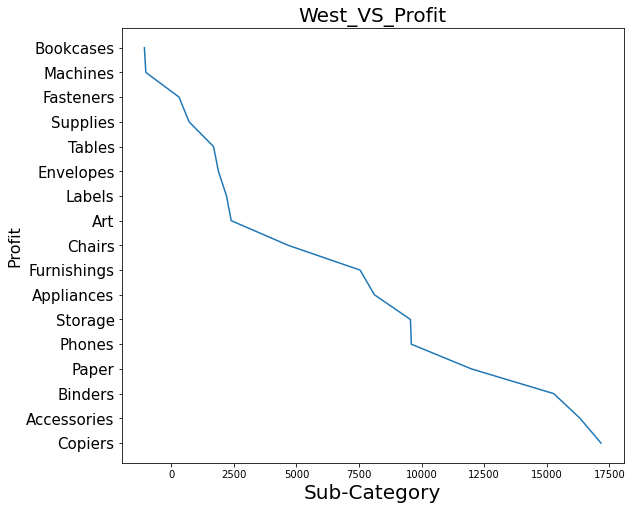

In [78]:
### looking at West_Vs_Profit in a line graph
plt.figure(figsize=[9,8])
plt.title("West_VS_Profit",size =20)
plt.xlabel("Sub-Category",size =20)
plt.ylabel("Profit",size = 16)
plt.yticks(size =15)
plt.plot(West_VS_Profit['Profit'],West_VS_Profit['Sub-Category'])
plt.show()

At the west warehouse the sub category copiers had the maximum profit 

### East Vs Profit

In [80]:
### finding the best sub category sold at the east warehouse
East_Vs_Profit = office_data[office_data['Region'] == 'East'].groupby('Sub-Category')['Profit'].sum().reset_index()
East_Vs_Profit = East_Vs_Profit.sort_values(by = 'Profit', ascending = False).reset_index(drop = True)
East_Vs_Profit

,Sub-Category,Profit
0,Copiers,16258.083640
1,Phones,11893.663019
2,Accessories,11034.954168
3,Chairs,10152.141777
4,Storage,9541.966384
5,Binders,9406.261358
6,Paper,8879.402079
7,Appliances,8098.599657
8,Furnishings,5920.061885
9,Machines,5116.319235


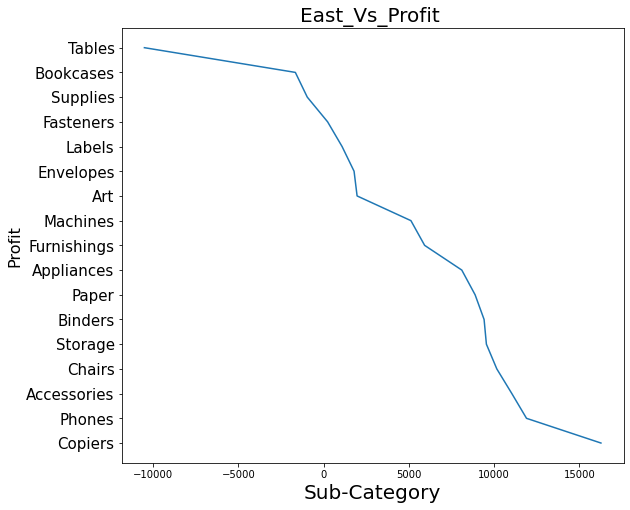

In [81]:
### looking at East_Vs_Profit  in a line graph
plt.figure(figsize=[9,8])
plt.title("East_Vs_Profit ",size =20)
plt.xlabel("Sub-Category",size =20)
plt.ylabel("Profit",size = 16)
plt.yticks(size =15)
plt.plot(East_Vs_Profit ['Profit'],East_Vs_Profit ['Sub-Category'])
plt.show()

At the east warehouse the sub category copiers had the maximum profit 

### Central Vs Profit

In [83]:
### finding the best sub category sold at the central warehouse
central_VS_Profit = office_data[office_data['Region'] == 'Central'].groupby('Sub-Category')['Profit'].sum().reset_index()
central_VS_Profit = central_VS_Profit.sort_values(by = 'Profit', ascending = False).reset_index(drop = True)
central_VS_Profit

,Sub-Category,Profit
0,Copiers,14461.728478
1,Phones,12246.878031
2,Accessories,6922.842386
3,Paper,6842.907046
4,Chairs,6836.621029
5,Storage,2659.394888
6,Envelopes,1482.492951
7,Art,1158.087386
8,Labels,957.832712
9,Fasteners,234.270619


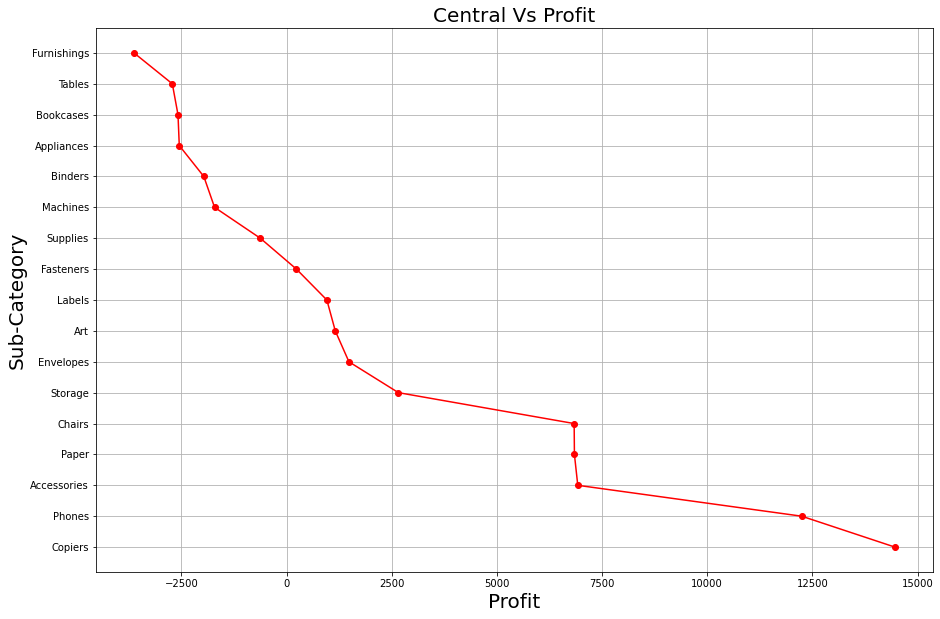

In [100]:
### looking at central_VS_Profit  in a line graph
plt.figure(figsize=[15,10])
plt.plot(central_VS_Profit['Profit'], central_VS_Profit['Sub-Category'], color='red', marker='o')
plt.title('Central Vs Profit', fontsize=20)
plt.xlabel('Profit', fontsize=20)
plt.ylabel('Sub-Category', fontsize=20)
plt.grid(True)
plt.show()

At the central warehouse the sub category copiers had the maximum profit 

### South Vs Profit

In [102]:
### finding the best sub category sold at the south warehouse
south_Vs_Profit = office_data[office_data['Region'] == 'South'].groupby('Sub-Category')['Profit'].sum().reset_index()
south_Vs_Profit  = south_Vs_Profit .sort_values(by = 'Profit', ascending = False).reset_index(drop = True)
south_Vs_Profit 

,Sub-Category,Profit
0,Phones,10831.816766
1,Accessories,6940.116862
2,Chairs,6928.218285
3,Paper,5861.391393
4,Appliances,3940.746262
5,Copiers,3766.875684
6,Furnishings,3518.357227
7,Binders,3184.917290
8,Storage,2796.580078
9,Bookcases,1421.184652


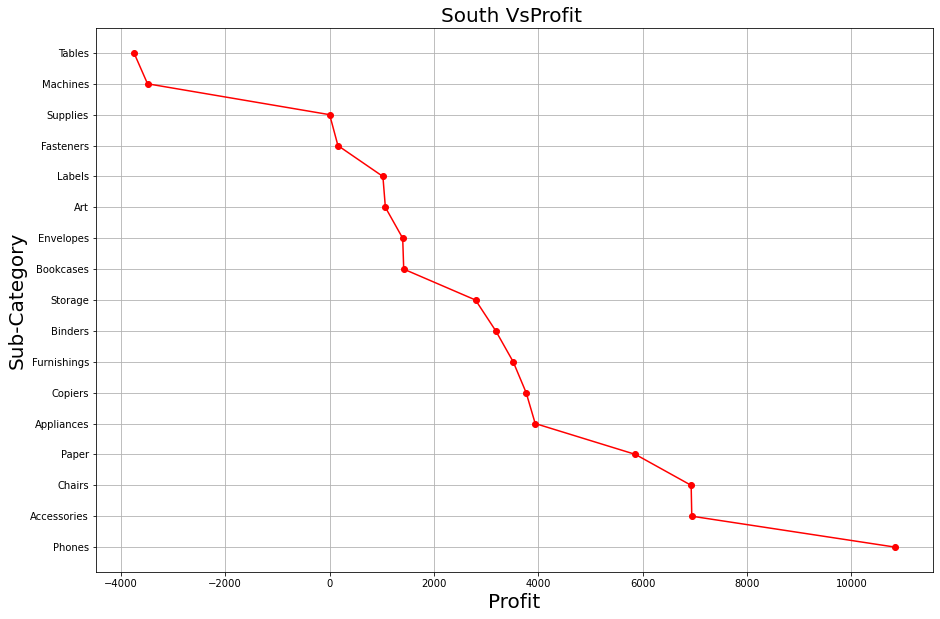

In [103]:
### looking at South Vs Profit in a line graph
plt.figure(figsize=[15,10])
plt.plot(south_Vs_Profit['Profit'],south_Vs_Profit ['Sub-Category'], color='red', marker='o')
plt.title('South VsProfit ', fontsize=20)
plt.xlabel('Profit', fontsize=20)
plt.ylabel('Sub-Category', fontsize=20)
plt.grid(True)
plt.show()

At the south warehouse the sub category phones had the maximum profit 

In [107]:
type(west.columns.tolist())

list

In [108]:
west.columns.tolist()

['Sub-Category_West', 'Profit_West']

In [109]:
regions = office_data.Region.unique().tolist()
regions
list_regions = [west, east, central, south]
list_regions

[   Sub-Category_West   Profit_West
 0            Copiers  17163.172701
 1        Accessories  16327.850894
 2            Binders  15277.381894
 3              Paper  11989.362627
 4             Phones   9588.659727
 5            Storage   9554.592790
 6         Appliances   8115.708608
 7        Furnishings   7540.761576
 8             Chairs   4673.597462
 9                Art   2393.172078
 10            Labels   2206.247374
 11         Envelopes   1882.552079
 12            Tables   1687.879664
 13          Supplies    710.547400
 14         Fasteners    310.127100
 15          Machines  -1016.765239
 16         Bookcases  -1073.566727,
    Sub-Category_East   Profit_East
 0            Copiers  16258.083640
 1             Phones  11893.663019
 2        Accessories  11034.954168
 3             Chairs  10152.141777
 4            Storage   9541.966384
 5            Binders   9406.261358
 6              Paper   8879.402079
 7         Appliances   8098.599657
 8        Furnishings   592

In [59]:
for df in list_regions:
    print(df.columns.tolist())

['Sub-Category', 'Profit']
['Sub-Category', 'Profit']
['Sub-Category', 'Profit']
['Sub-Category', 'Profit']


In [60]:
### storing warehouse in a new container for easier analysis 
new_columns = []
new_columns_no_duplicates = []
for region in regions:
    a = region.lower()
    for df in list_regions:
        for column in df.columns.tolist():
            new_col = column + '_' + region
            new_columns.append(new_col)

for item in new_columns:
    if item not in new_columns_no_duplicates:
        new_columns_no_duplicates.append(item)
    else:
        pass
print(new_columns)
            
            
    

['Sub-Category_West', 'Profit_West', 'Sub-Category_West', 'Profit_West', 'Sub-Category_West', 'Profit_West', 'Sub-Category_West', 'Profit_West', 'Sub-Category_East', 'Profit_East', 'Sub-Category_East', 'Profit_East', 'Sub-Category_East', 'Profit_East', 'Sub-Category_East', 'Profit_East', 'Sub-Category_Central', 'Profit_Central', 'Sub-Category_Central', 'Profit_Central', 'Sub-Category_Central', 'Profit_Central', 'Sub-Category_Central', 'Profit_Central', 'Sub-Category_South', 'Profit_South', 'Sub-Category_South', 'Profit_South', 'Sub-Category_South', 'Profit_South', 'Sub-Category_South', 'Profit_South']


In [61]:
### slicing new columns to get non duplicates  
west.columns = new_columns_no_duplicates[:2]
east.columns = new_columns_no_duplicates[2:4]
central.columns = new_columns_no_duplicates[4:6]
south.columns = new_columns_no_duplicates[6:8]

In [111]:
### merging various warehouse 
combined_regions = west.merge(east, left_index=True, right_index=True).merge(south, 
left_index=True, right_index=True).merge(
central, left_index=True, right_index=True)

In [112]:
combined_regions.columns

Index(['Sub-Category_West', 'Profit_West', 'Sub-Category_East', 'Profit_East',
       'Sub-Category_South', 'Profit_South', 'Sub-Category_Central',
       'Profit_Central'],
      dtype='object')

In [64]:
### combining the various warehouse to form dataframe
pd.concat([combined_regions[:6], combined_regions[-6:]])

,Sub-Category_West,Profit_West,Sub-Category_East,Profit_East,Sub-Category_South,Profit_South,Sub-Category_Central,Profit_Central
0,Copiers,17163.172701,Copiers,16258.083640,Phones,10831.816766,Copiers,14461.728478
1,Accessories,16327.850894,Phones,11893.663019,Accessories,6940.116862,Phones,12246.878031
2,Binders,15277.381894,Accessories,11034.954168,Chairs,6928.218285,Accessories,6922.842386
3,Paper,11989.362627,Chairs,10152.141777,Paper,5861.391393,Paper,6842.907046
4,Phones,9588.659727,Storage,9541.966384,Appliances,3940.746262,Chairs,6836.621029
5,Storage,9554.592790,Binders,9406.261358,Copiers,3766.875684,Storage,2659.394888
11,Envelopes,1882.552079,Envelopes,1782.652816,Art,1069.734675,Machines,-1711.751334
12,Tables,1687.879664,Labels,1079.660817,Labels,1022.445393,Binders,-1967.698578
13,Supplies,710.547400,Fasteners,231.098695,Fasteners,160.716647,Appliances,-2550.658782
14,Fasteners,310.127100,Supplies,-961.822008,Supplies,1.997850,Bookcases,-2581.158786


### West Againts Profits

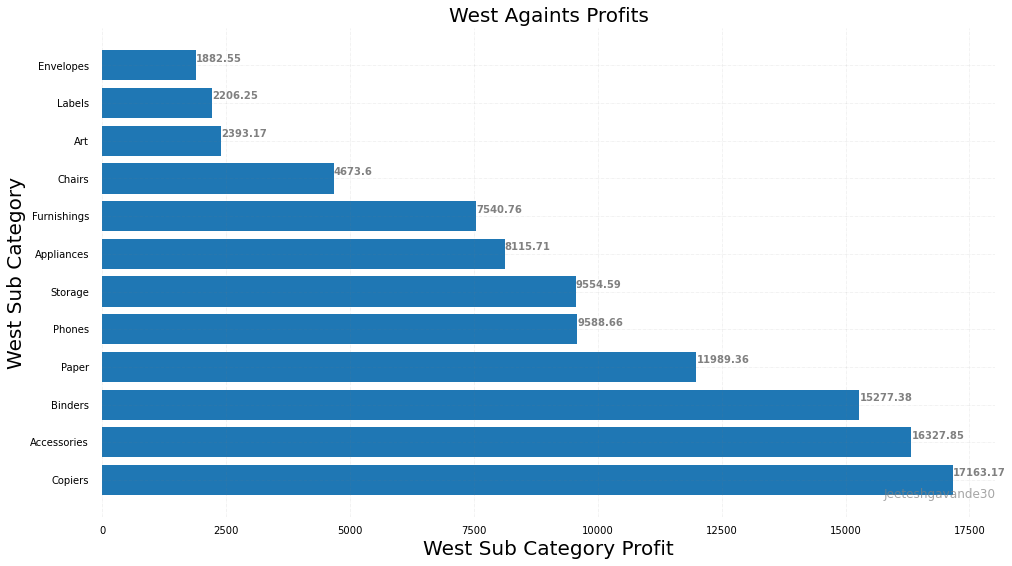

In [128]:
### Showing the West Againts Profits on the bar chart 
name = combined_regions['Sub-Category_West'].head(12)
price = combined_regions['Profit_West'].head(12)
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(name, price)
plt.xlabel('West Sub Category Profit',fontsize=20)
plt.ylabel('West Sub Category', fontsize=20)

 
for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.xaxis.set_tick_params(pad = 5)
        ax.yaxis.set_tick_params(pad = 10)
        ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.5, alpha = 0.2)
        ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),fontsize = 10, fontweight ='bold',color ='grey')
    
ax.set_title('West Againts Profits',loc ='center', fontsize =20)
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12, color ='grey', ha ='right', va ='bottom',alpha = 0.7)
plt.show()

Copiers,Accessories,Binders,West,Appliances,Furnishings,Art,Labels,Envelopes,Tables,Supplies and Fasteners shoud be moved to the west warehouse since it has the highest purchase compared to  the other three warehouses .

### East Against Profits

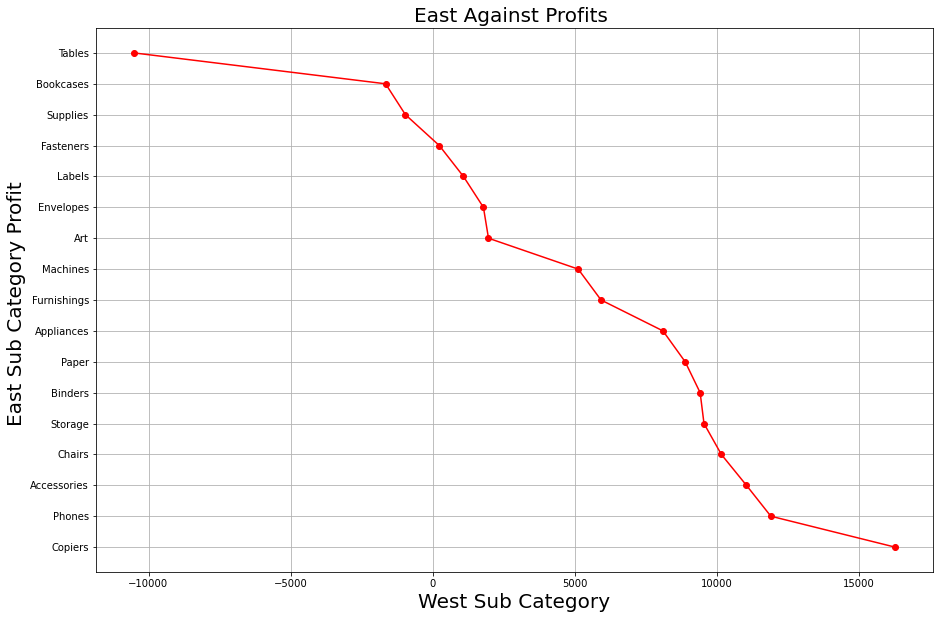

In [133]:
### looking at East Against Profits  in a line graph
plt.figure(figsize=[15,10])
plt.plot(combined_regions['Profit_East'],combined_regions['Sub-Category_East'], color='red', marker='o')
plt.title('East Against Profits ', fontsize=20)
plt.xlabel('West Sub Category', fontsize=20)
plt.ylabel('East Sub Category Profit ', fontsize=20)
plt.grid(True)
plt.show()

Machines should be moved to the East warehouse since it has the maximum sales or profit.

###  Central Against Profits

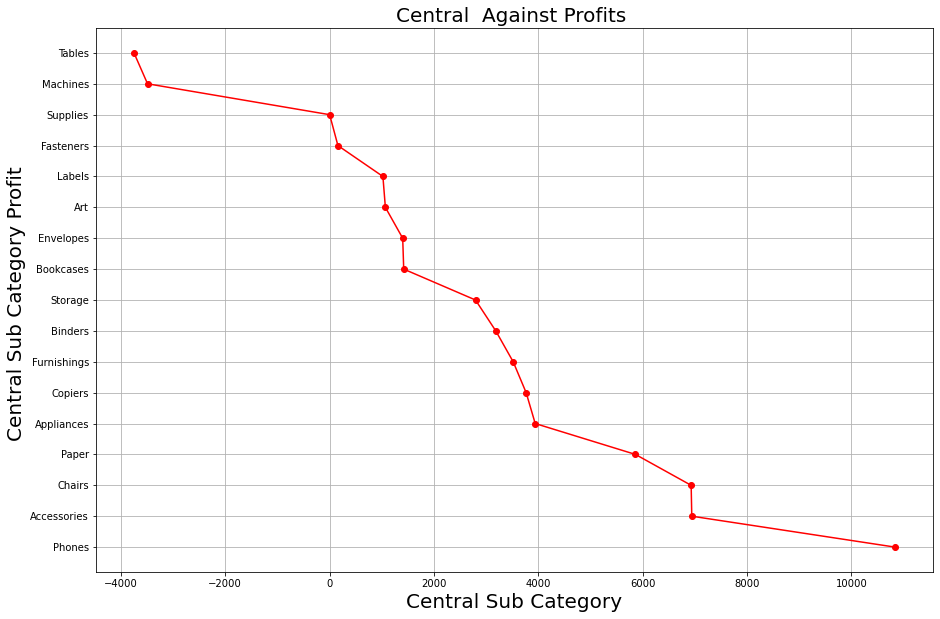

In [134]:
### looking at Central Against Profits  in a line graph
plt.figure(figsize=[15,10])
plt.plot(combined_regions['Profit_South'],combined_regions['Sub-Category_South'], color='red', marker='o')
plt.title('Central  Against Profits ', fontsize=20)
plt.xlabel('Central Sub Category', fontsize=20)
plt.ylabel('Central Sub Category Profit ', fontsize=20)
plt.grid(True)
plt.show()

Phones,Chairs,Bookcases should be moved to the central warehouse since it has the maximum sales or profit.

### South Against Profits

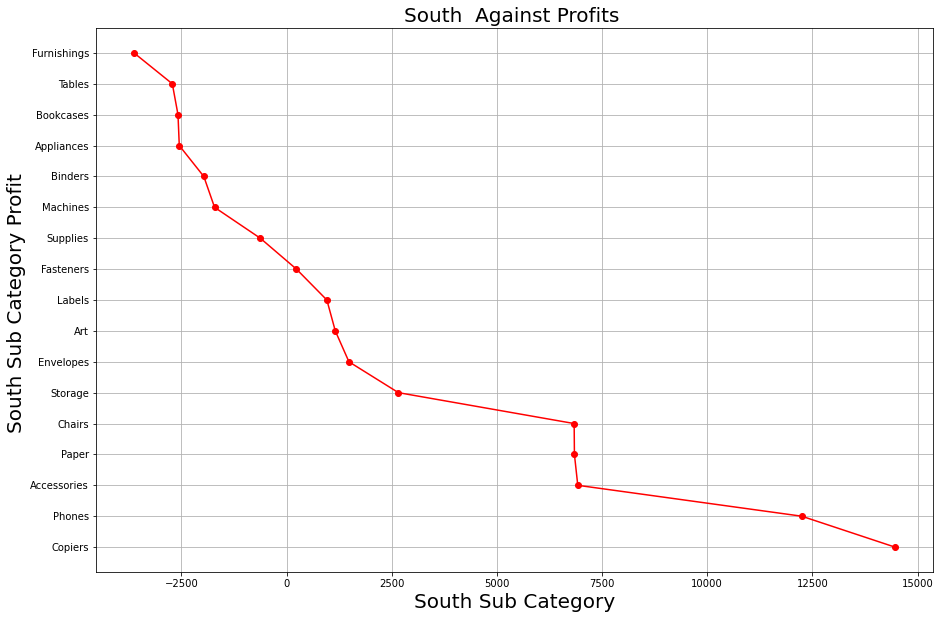

In [136]:
### looking at  South Against Profits in a line graph
plt.figure(figsize=[15,10])
plt.plot(combined_regions['Profit_Central'],combined_regions['Sub-Category_Central'], color='red', marker='o')
plt.title('South  Against Profits ', fontsize=20)
plt.xlabel('South Sub Category', fontsize=20)
plt.ylabel('South Sub Category Profit ', fontsize=20)
plt.grid(True)
plt.show()

Paper should be moved to the south warehouse since its better sold  there compared to the other warehouses.

In [137]:
combined_regions.columns=['Sub_Category_West', 'Profit_West', 'Sub_Category_East',
       'Profit_East', 'Sub_Category_Central', 'Profit_Central',
       'Sub_Category_South', 'Profit_South']

In [138]:
combined_regions

,Sub_Category_West,Profit_West,Sub_Category_East,Profit_East,Sub_Category_Central,Profit_Central,Sub_Category_South,Profit_South
0,Copiers,17163.172701,Copiers,16258.083640,Phones,10831.816766,Copiers,14461.728478
1,Accessories,16327.850894,Phones,11893.663019,Accessories,6940.116862,Phones,12246.878031
2,Binders,15277.381894,Accessories,11034.954168,Chairs,6928.218285,Accessories,6922.842386
3,Paper,11989.362627,Chairs,10152.141777,Paper,5861.391393,Paper,6842.907046
4,Phones,9588.659727,Storage,9541.966384,Appliances,3940.746262,Chairs,6836.621029
5,Storage,9554.592790,Binders,9406.261358,Copiers,3766.875684,Storage,2659.394888
6,Appliances,8115.708608,Paper,8879.402079,Furnishings,3518.357227,Envelopes,1482.492951
7,Furnishings,7540.761576,Appliances,8098.599657,Binders,3184.917290,Art,1158.087386
8,Chairs,4673.597462,Furnishings,5920.061885,Storage,2796.580078,Labels,957.832712
9,Art,2393.172078,Machines,5116.319235,Bookcases,1421.184652,Fasteners,234.270619


Copiers,Accessories,Binders,West,Appliances,Furnishings,Art,Labels,Envelopes,Tables,Supplies and Fasteners shoud be moved to the west warehouse since it has the highest purchase compared to  the other three warehouses .Machines should be moved to the East warehouse since it has the maximum sales or profit. Phones,Chairs,Bookcases should be moved to the central warehouse since it has the maximum sales or profit. Paper should be moved to the south warehouse since its better sold  there compared to the other warehouses.